<a href="https://colab.research.google.com/github/ARuizChang/NeuralNetworks/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST NN

In [111]:
!wget https://raw.githubusercontent.com/ARuizChang/NeuralNetworks/refs/heads/main/train.csv

--2025-01-27 16:33:18--  https://raw.githubusercontent.com/ARuizChang/NeuralNetworks/refs/heads/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76733040 (73M) [text/plain]
Saving to: ‘train.csv.13’

train.csv.13        100%[===================>]  73.18M   140MB/s    in 0.5s    

2025-01-27 16:33:19 (140 MB/s) - ‘train.csv.13’ saved [76733040/76733040]



In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.ndimage import rotate, shift, zoom


In [113]:
# Load and preprocess data
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Normalize data
X = data[:, 1:] / 255.0
Y = data[:, 0].astype(np.int32)  # Convert to integers

# Split data into training and development sets
X_dev = X[:1000]
Y_dev = Y[:1000].astype(np.int32)  # Convert to integers
X_train = X[1000:]
Y_train = Y[1000:].astype(np.int32)  # Convert to integers


In [114]:
Y_train

array([1, 2, 0, ..., 5, 7, 6], dtype=int32)

# Simple MNIST NN

## Neural Network Architecture
* Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image.
* Hidden layer $a^{[1]}$ will have 100 units with ReLU activation.
* Hidden layer $a^{[2]}$ will have 50 units with ReLU activation.
* Hidden layer $a^{[3]}$ will have 20 units with ReLU activation.
* Output layer $a^{[4]}$ will have 10 units with softmax activation.

## Forward Pass
$Z^{[1]} = W^{[1]} X + b^{[1]}$

$A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$

$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

$A^{[2]} = g_{\text{ReLU}}(Z^{[2]})$

$Z^{[3]} = W^{[3]} A^{[2]} + b^{[3]}$

$A^{[3]} = g_{\text{ReLU}}(Z^{[3]})$

$Z^{[4]} = W^{[4]} A^{[3]} + b^{[4]}$

$A^{[4]} = g_{\text{softmax}}(Z^{[4]})$

## Backward Propagation
$dZ^{[4]} = A^{[4]} - Y$

$dW^{[4]} = \frac{1}{m} dZ^{[4]} A^{[3]T}$

$dB^{[4]} = \frac{1}{m} \sum dZ^{[4]}$

$dZ^{[3]} = W^{[4]T} dZ^{[4]} \cdot g^{[3]\prime} (Z^{[3]})$

$dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$

$dB^{[3]} = \frac{1}{m} \sum dZ^{[3]}$

$dZ^{[2]} = W^{[3]T} dZ^{[3]} \cdot g^{[2]\prime} (Z^{[2]})$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \sum dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime} (Z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \sum dZ^{[1]}$

## Parameter Updates
$W^{[4]} := W^{[4]} - \alpha dW^{[4]}$

$b^{[4]} := b^{[4]} - \alpha db^{[4]}$

$W^{[3]} := W^{[3]} - \alpha dW^{[3]}$

$b^{[3]} := b^{[3]} - \alpha db^{[3]}$

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

## ReLU
$F(x) = \max(0, x)$

## Softmax
$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

## Variables and Shapes

### Forward Pass
* $A^{[0]} = X$: 784 x m
* $Z^{[1]} \sim A^{[1]}$: 100 x m
* $W^{[1]}$: 100 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
* $b^{[1]}$: 100 x 1
* $Z^{[2]} \sim A^{[2]}$: 50 x m
* $W^{[2]}$: 50 x 100 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
* $b^{[2]}$: 50 x 1
* $Z^{[3]} \sim A^{[3]}$: 20 x m
* $W^{[3]}$: 20 x 50 (as $W^{[3]} A^{[2]} \sim Z^{[3]}$)
* $b^{[3]}$: 20 x 1
* $Z^{[4]} \sim A^{[4]}$: 10 x m
* $W^{[4]}$: 10 x 20 (as $W^{[4]} A^{[3]} \sim Z^{[4]}$)
* $b^{[4]}$: 10 x 1

### Backpropagation
* $dZ^{[4]}$: 10 x m ($\sim A^{[4]}$)
* $dW^{[4]}$: 10 x 20
* $dB^{[4]}$: 10 x 1
* $dZ^{[3]}$: 20 x m ($\sim A^{[3]}$)
* $dW^{[3]}$: 20 x 50
* $dB^{[3]}$: 20 x 1
* $dZ^{[2]}$: 50 x m ($\sim A^{[2]}$)
* $dW^{[2]}$: 50 x 100
* $dB^{[2]}$: 50 x 1
* $dZ^{[1]}$: 100 x m ($\sim A^{[1]}$)
* $dW^{[1]}$: 100 x 784
* $dB^{[1]}$: 100 x 1

### Parameters:
- $\alpha$: Learning rate (default is 0.001)

In [115]:
def one_hot(Y):
    num_classes = int(np.max(Y)) + 1  # MNIST has 10 classes
    one_hot_Y = np.zeros((Y.size, num_classes))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Augmentation functions
def random_rotation(image, angle_range=(-15, 15)):
    angle = np.random.uniform(angle_range[0], angle_range[1])
    return rotate(image, angle, reshape=False, mode='nearest')

def random_shift(image, shift_range=(-2, 2)):
    shift_values = [np.random.uniform(shift_range[0], shift_range[1]) for _ in range(2)]
    return shift(image, shift_values, mode='nearest')

def random_zoom(image, zoom_range=(0.9, 1.1)):
    zoom_factor = np.random.uniform(zoom_range[0], zoom_range[1])
    zoomed_image = zoom(image, zoom_factor, order=1)
    return zoomed_image

def resize_image(image, shape=(28, 28)):
    zoom_factors = (shape[0] / image.shape[0], shape[1] / image.shape[1])
    return zoom(image, zoom_factors, order=1)

def augment_image(image):
    image = image.reshape(28, 28)
    image = random_rotation(image)
    image = random_shift(image)
    image = random_zoom(image)
    image = resize_image(image, (28, 28))  # Ensure shape remains consistent
    return image.flatten()

def augment_data(X):
    augmented_X = np.zeros_like(X)
    for i in range(X.shape[0]):
        augmented_X[i] = augment_image(X[i])
    return augmented_X

def init_params():
    W1 = np.random.randn(100, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((100, 1))
    W2 = np.random.randn(50, 100) * np.sqrt(2 / 100)
    b2 = np.zeros((50, 1))
    W3 = np.random.randn(20, 50) * np.sqrt(2 / 50)
    b3 = np.zeros((20, 1))
    W4 = np.random.randn(10, 20) * np.sqrt(2 / 20)
    b4 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3, W4, b4


# Activation functions
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

def ReLU_derivative(Z):
    return Z > 0

# Dropout
def dropout(A, keep_prob):
    D = np.random.rand(*A.shape) < keep_prob
    A = A * D
    A = A / keep_prob
    return A, D

# Forward pass
def forward_pass(X, W1, b1, W2, b2, W3, b3, W4, b4, keep_prob=0.8):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    if keep_prob < 1.0:
        A1, D1 = dropout(A1, keep_prob)
    else:
        D1 = None

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    if keep_prob < 1.0:
        A2, D2 = dropout(A2, keep_prob)
    else:
        D2 = None

    Z3 = W3.dot(A2) + b3
    A3 = ReLU(Z3)
    if keep_prob < 1.0:
        A3, D3 = dropout(A3, keep_prob)
    else:
        D3 = None

    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)

    return Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4

def backward_prop(X, Y, Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, W2, W3, W4, keep_prob=0.8):
    m = X.shape[1]

    if len(Y.shape) == 1:
        Y = one_hot(Y)

    # Output layer
    dZ4 = A4 - Y
    dW4 = 1/m * dZ4.dot(A3.T)
    db4 = 1/m * np.sum(dZ4, axis=1, keepdims=True)

    # Third hidden layer
    dA3 = W4.T.dot(dZ4)
    dA3 = dA3 * D3 / keep_prob
    dZ3 = dA3 * ReLU_derivative(Z3)
    dW3 = 1/m * dZ3.dot(A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    # Second hidden layer
    dA2 = W3.T.dot(dZ3)
    dA2 = dA2 * D2 / keep_prob
    dZ2 = dA2 * ReLU_derivative(Z2)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    # First hidden layer
    dA1 = W2.T.dot(dZ2)
    dA1 = dA1 * D1 / keep_prob
    dZ1 = dA1 * ReLU_derivative(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3, dW4, db4



def update_params(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    W4 = W4 - alpha * dW4
    b4 = b4 - alpha * db4

    return W1, b1, W2, b2, W3, b3, W4, b4




In [116]:
X_train_augmented = augment_data(X_train)

In [117]:
def gradient_descent(X, Y, alpha, iterations, decay_rate=0.1, decay_step=100):

    m = X.shape[0]

    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()

    for i in range(iterations):
        Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4 = forward_pass(X.T, W1, b1, W2, b2, W3, b3, W4, b4)

        dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backward_prop(X.T, Y, Z1, A1, D1, Z2, A2, D2, Z3, A3, D3, Z4, A4, W2, W3, W4)

        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(
            W1, b1, W2, b2, W3, b3, W4, b4,
            dW1, db1, dW2, db2, dW3, db3, dW4, db4,
            alpha
        )

        if i % decay_step == 0 and i != 0:
          alpha = alpha / (1 + decay_rate * (i // decay_step))

        if i % 10 == 0:
            predictions = np.argmax(A4, axis=0)
            if len(Y.shape) == 1:
                Y_one_hot = one_hot(Y)
                accuracy = np.mean(predictions == np.argmax(Y_one_hot, axis=0))
            else:
                accuracy = np.mean(predictions == np.argmax(Y, axis=0))
            print(f"Iteration {i}, Accuracy: {accuracy}, Learning Rate: {alpha}")

    return W1, b1, W2, b2, W3, b3, W4, b4



In [118]:
# Train the model
W1, b1, W2, b2, W3, b3, W4, b4 = gradient_descent(X_train_augmented, Y_train, alpha=0.050, iterations=1000, decay_step=250)


Iteration 0, Accuracy: 0.09134146341463414, Learning Rate: 0.05
Iteration 10, Accuracy: 0.1207560975609756, Learning Rate: 0.05
Iteration 20, Accuracy: 0.16278048780487805, Learning Rate: 0.05
Iteration 30, Accuracy: 0.1970487804878049, Learning Rate: 0.05
Iteration 40, Accuracy: 0.22653658536585367, Learning Rate: 0.05
Iteration 50, Accuracy: 0.2559512195121951, Learning Rate: 0.05
Iteration 60, Accuracy: 0.27814634146341466, Learning Rate: 0.05
Iteration 70, Accuracy: 0.3023658536585366, Learning Rate: 0.05
Iteration 80, Accuracy: 0.32090243902439025, Learning Rate: 0.05
Iteration 90, Accuracy: 0.34504878048780485, Learning Rate: 0.05
Iteration 100, Accuracy: 0.36141463414634145, Learning Rate: 0.05
Iteration 110, Accuracy: 0.37590243902439024, Learning Rate: 0.05
Iteration 120, Accuracy: 0.3912439024390244, Learning Rate: 0.05
Iteration 130, Accuracy: 0.4031707317073171, Learning Rate: 0.05
Iteration 140, Accuracy: 0.4135853658536585, Learning Rate: 0.05
Iteration 150, Accuracy: 0.4

In [123]:
# Evaluate the model
Z1, A1, _, Z2, A2, _, Z3, A3, _, Z4, A4 = forward_pass( X_dev.T, W1, b1, W2, b2, W3, b3, W4, b4, keep_prob=1.0 )

predictions = np.argmax(A4, axis=0)
if len(Y_dev.shape) == 2:
    true_labels = np.argmax(Y_dev, axis=1)
else:
    true_labels = Y_dev

accuracy = np.mean(predictions == true_labels)
print(f"Development set accuracy: {accuracy}")



def display_prediction(index):
    plt.imshow(X_dev[index].reshape(28, 28), cmap='gray')

    if len(Y_dev.shape) == 1:  # 1D labels
        plt.title(f"Prediction: {predictions[index]}, True Label: {Y_dev[index]}")
    elif len(Y_dev.shape) == 2:  # One-hot encoded labels
        plt.title(f"Prediction: {predictions[index]}, True Label: {np.argmax(Y_dev[:, index])}")

    plt.show()

Development set accuracy: 0.919


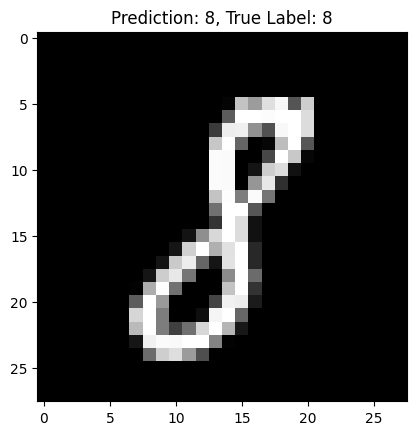

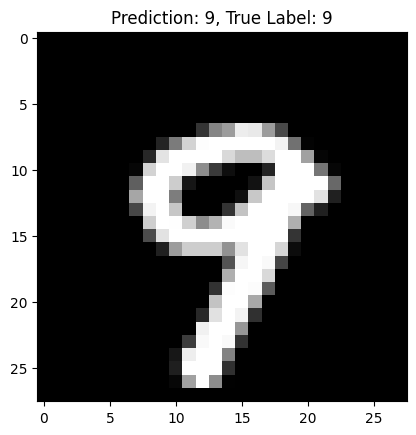

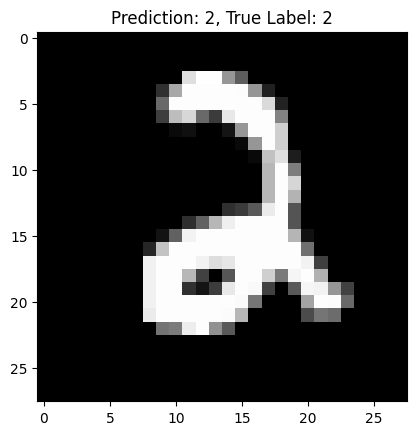

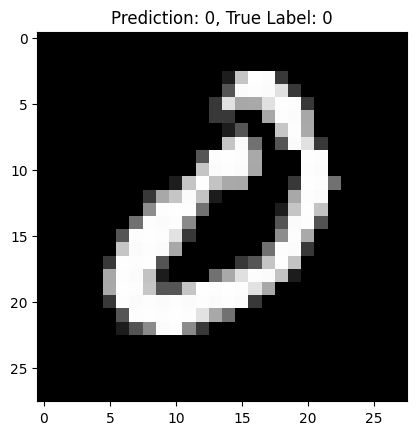

In [120]:
display_prediction(0)
display_prediction(1)
display_prediction(2)
display_prediction(3)